In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables, means start mappig from engine
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [10]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [14]:
# date 1 year ago from today
year_ago = dt.date.today() - dt.timedelta(days=730)


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
sel=[Measurement.date,
     Measurement.tobs]
day_prcp=session.query(*sel).filter((Measurement.date>year_ago)).all()


In [16]:
resultsfff = session.query(Measurement.date, func.avg(Measurement.tobs), func.max(Measurement.tobs), func.min(Measurement.tobs)).\
        filter(Measurement.date == '2017-08-07').all()
resultsfff        

[('2017-08-07', 80.5, 83.0, 78.0)]

In [18]:
#create json for flak ==for surapp
sel_tobs_result=session.query(Station.name,Measurement.date,Measurement.tobs).filter(Measurement.date>year_ago).all()
sel_tobs_result
station_tob_list=[]
for result in sel_tobs_result:
    row={}
    row['name']=result[0]
    row['date']=result[1]
    row['tobs']=result[2]
    station_tob_list.append(row)
  

In [19]:
#createq query for station list
sel_station=[Station.station,
             Station.name,
             Station.latitude,
             Station.longitude,
             Station.elevation]
station_qu=session.query(*sel_station).all()  


In [20]:
##create json list for flask
station_list = []
for result in station_qu:
        row = {}
        row['name'] = result[0]
        row['station'] = result[1]
        row['latitude'] = result[2]
        row['longitude'] = result[3]
        row['elevation'] = result[4]
        station_list.append(row)


In [21]:
#query the max avg and min  by date testing
cal_sql=[Measurement.date,
             func.min(Measurement.tobs),
             func.avg(Measurement.tobs),
             func.max(Measurement.tobs)]
cal_max_min_avg_result=session.query(*cal_sql).filter(Measurement.date>='2017-08-02',Measurement.date<='2017-08-08').group_by(Measurement.date).all()


In [22]:
#create json object for max avg and min testing
temp_comp=[]
for result in cal_max_min_avg_result:
        row = {}
        row['Date']=result[0]
        row['Min Temperature']=result[1]
        row['Avg Temperature']=result[2]
        row['Max Temperature']=result[3]
        temp_comp.append(row)


In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
sel=[Measurement.date,
     func.sum(Measurement.prcp)]
day_prcp=session.query(*sel).filter((Measurement.date>=year_ago)).filter((Measurement.date<'2017-08-04')).group_by(Measurement.date).all()


In [26]:
df_d=pd.DataFrame(day_prcp,columns=['date','Prcp'])
df_d['date'].head()

0    2016-08-05
1    2016-08-06
2    2016-08-07
3    2016-08-08
4    2016-08-09
Name: date, dtype: object

<IPython.core.display.Javascript object>


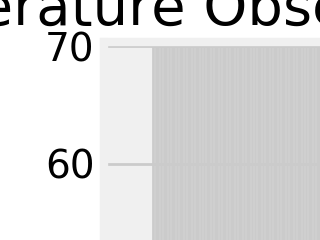

In [27]:
Precipitation,=plt.plot(df_d['date'], df_d['Prcp'],label='precipitation')
plt.tight_layout()
#plt.savefig("date_Fre.png")
plt.show()

In [28]:
# Add labels to X and Y axes :: Add title
plt.title("homework")
plt.xlabel("Date")
plt.ylabel("Prcp")

Text(33.6735,0.5,'Prcp')

In [29]:
# Create a legend for the chart
plt.legend(handles=[Precipitation], loc="best")
plt.savefig("date_Fre.png")

In [30]:
# Design a query to retrieve precipitation data and plot the results
sel1=[Measurement.date,
     func.sum(Measurement.prcp)]
all_prcp=session.query(*sel1).group_by(Measurement.date).all()




In [31]:
#create dataframe
df_all=pd.DataFrame(all_prcp,columns=['date','Prcp'])
df_all.head()

,date,Prcp
0,2010-01-01,1.06
1,2010-01-02,0.02
2,2010-01-03,0.00
3,2010-01-04,0.01
4,2010-01-05,0.03


In [32]:
#all data's statistics for the precipitation data
df_all.describe()

,Prcp
count,2792.000000
mean,1.041594
std,2.224333
min,0.000000
25%,0.060000
50%,0.380000
75%,1.130000
max,37.410000


In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_d.describe()

,Prcp
count,364.000000
mean,1.029615
std,1.796466
min,0.000000
25%,0.060000
50%,0.420000
75%,1.150000
max,14.280000


In [34]:

# Design a query to retrieve data from Station matadata table data
sel2=[Station.name,
     func.count(Station.name)]
station_count=session.query(*sel2).group_by(Station.name).all()
nb_st=len(station_count)
print(f"The total numbers of available statations is {nb_st} ")
#session.query(func.count(User.id)).scalar() 

The total numbers of available statations is 9 


In [35]:
# show the Station table
sel_all=[Station.id,
         Station.station,
         Station.name,
         Station.latitude,
         Station.longitude,
         Station.elevation]
sel_all_station=session.query(*sel_all).all()
station_df=pd.DataFrame(sel_all_station,columns=['id','Station','name','latitude','longitude','elevation'])
station_df

,id,Station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [36]:
#show the measurement table list
sel_measure=[Measurement.id,
             Measurement.station,
             Measurement.date,
             Measurement.prcp,
             Measurement.tobs]
#return list from session.query
sel_all_measure=session.query(*sel_measure).all()
measure_df=pd.DataFrame(sel_all_measure,columns=['id','station','date','prcp','tobs'])
measure_df.head()                   

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [37]:
# U# What are the most active stations?
# List the stations and the counts in descending order.
#define the query
act_sta_sel=[
             Measurement.station,
             func.count(Measurement.station)]
#use session to query 
count_station=session.query(*act_sta_sel).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
count_station_df=pd.DataFrame(count_station,columns=['station','Count_station'])
activate_station_id=count_station_df.iloc[0].station
#count_station_df
count_station
#activate_station_id
   

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [38]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel_measure1=[
             Measurement.station,
             func.min(Measurement.tobs),
             func.max(Measurement.tobs),
             func.avg(Measurement.tobs)]
#return list from session.query
sel_all_measure1=session.query(*sel_measure1).filter(Measurement.station==activate_station_id).group_by(Measurement.station).all()
#measure_df1=pd.DataFrame(sel_all_measure1,columns=['station','lowest Temp','Highest Temp','Average'])
sel_all_measure1

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [39]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#get the station name with the highest numner of temperature 

max_tobs_station=session.query(Measurement.tobs).\
filter(Measurement.station==activate_station_id,(Measurement.date<'2017-08-04'),(Measurement.date>='2016-08-04')).all()


In [40]:
len(max_tobs_station)

362

In [41]:
print(max_tobs_station[0][0])

77.0


In [42]:
tobs_t = [temp[0] for temp in max_tobs_station]

<IPython.core.display.Javascript object>


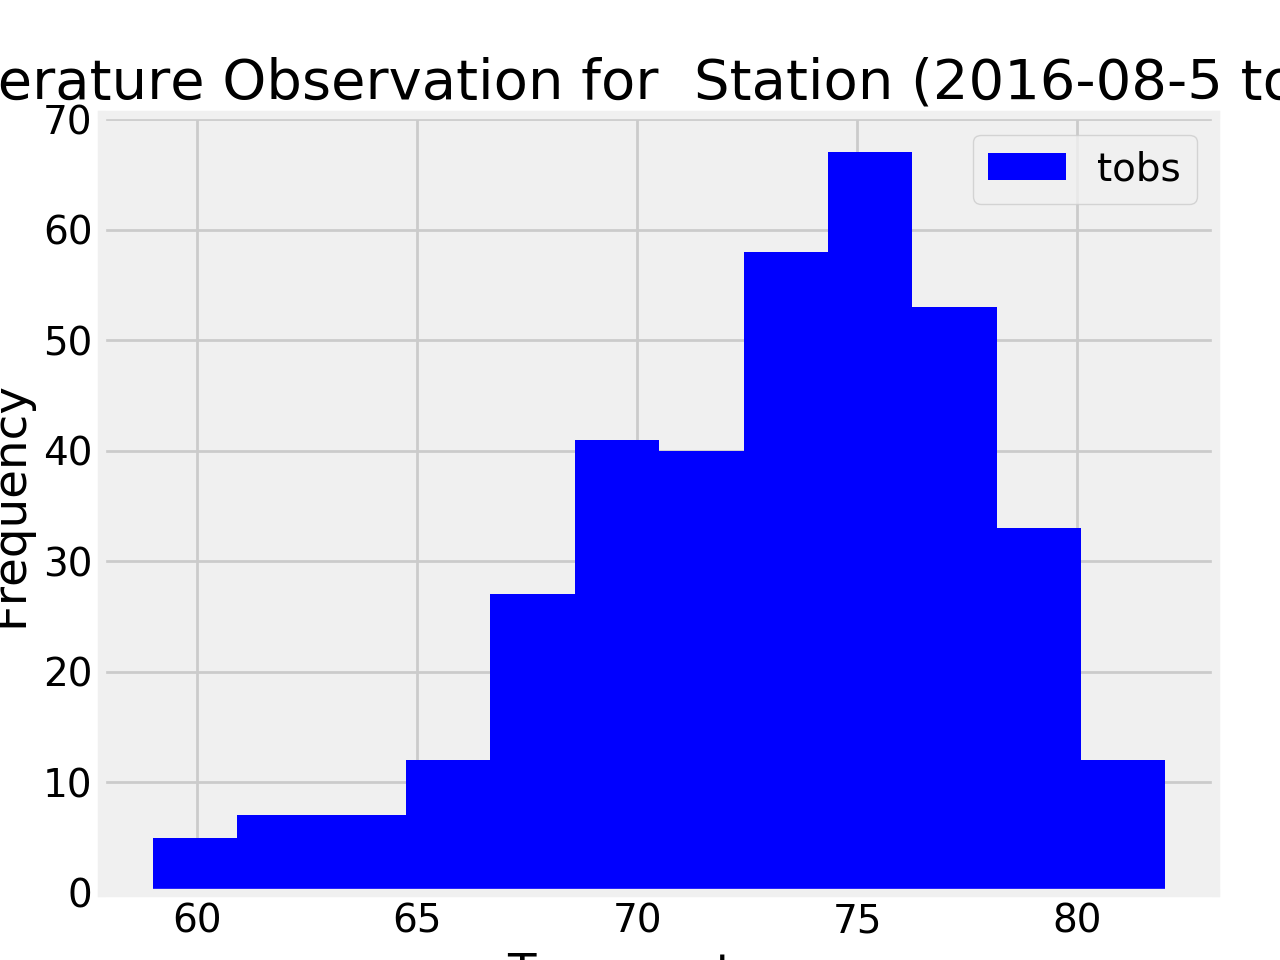

In [45]:
plt.hist(tobs_t, bins=12, color='b')
plt.title("Temperature Observation for  Station (2016-08-5 to 2017)")
plt.ylabel('Frequency')
plt.xlabel('Temperature')
labels = ['tobs']
plt.legend(labels)
plt.savefig("fig2.png")
plt.show()

# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

result=calc_temps('2017-01-01','2017-05-23')

In [46]:
def calc_temps1(start_date, end_date):
    query = session.query(Measurement.tobs).filter(Measurement.date>=start_date, Measurement.date<=end_date).all()
    temper = [temp[0] for temp in query]
    avg_temp = np.mean(temper)
    lowest_temp = min(temper)
    highest_temp = max(temper)
    

    plt.figure(figsize=(3,5))
    plt.bar(1, avg_temp, yerr=(highest_temp - lowest_temp), tick_label='', color='pink')
    plt.ylabel("Temperature", weight="bold")
    plt.title("Average Trip Temperature", weight="bold")
    plt.savefig("Fig3.png")
    plt.show()

<IPython.core.display.Javascript object>


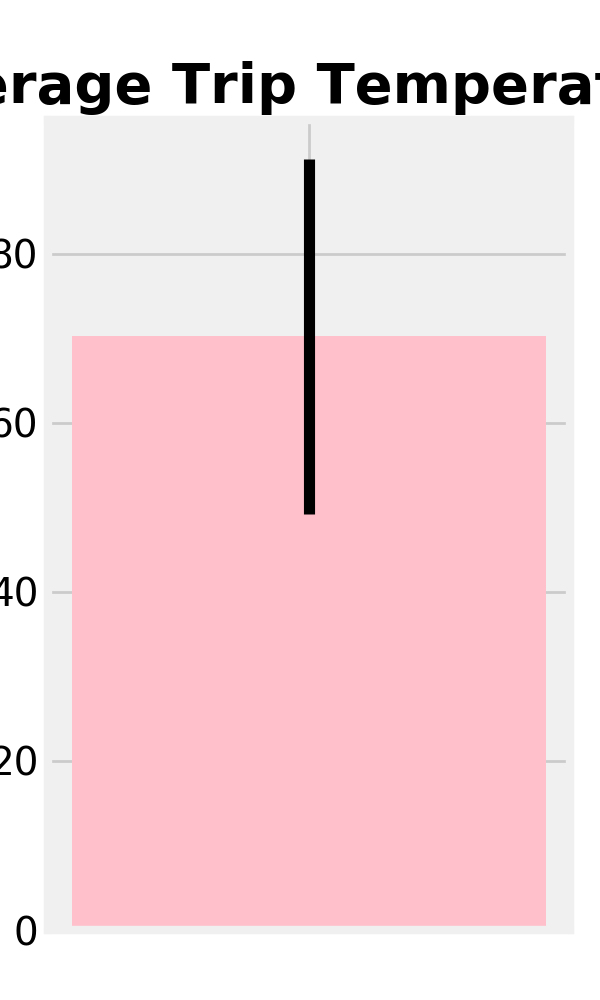

In [47]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps1('2017-01-17','2017-03-03')

In [48]:
#this is optional. i will do it if i have time later today

# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.

# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall_sql=[Measurement.station,
              func.sum(Measurement.prcp)]
rainfal_station=session.query(*rainfall_sql).filter(Measurement.date>='2016-08-05').filter(Measurement.date<='2017-08-05').group_by(Measurement.station).all()

rainfal_station

[('USC00513117', 51.20000000000003),
 ('USC00514830', 33.81),
 ('USC00516128', 154.87000000000006),
 ('USC00517948', 4.619999999999999),
 ('USC00519281', 74.41000000000001),
 ('USC00519397', 17.04999999999999),
 ('USC00519523', 38.940000000000005)]